**Question:** This notebook covers the principle on how to compute Pi from a set of uniform samples. In other words if you had access to a uniform random number generator, how will you compute the value of Pi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Answer**: Consider the following figure. 

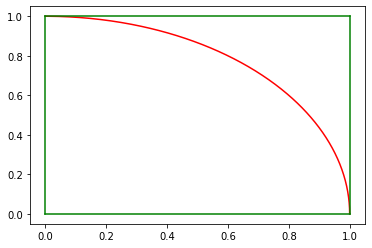

In [2]:
theta_90 = np.linspace(0, np.pi/2, 500)
x_arc = np.cos(theta_90)
y_arc = np.sin(theta_90)
plt.figure()
plt.plot(x_arc, y_arc, 'r')
plt.plot([0,1],[0,0], 'g')
plt.plot([1,1],[0,1], 'g')
plt.plot([1,0],[1,1], 'g')
plt.plot([0,0],[1,0], 'g')
plt.show()

The above plot consists of a quarter arc and a square. The square is of side length 1 and the radius of the arc is also 1. Consider the area of the region covered by the square and the area covered by the arc.

The area enclosed by the square =  1 * 1 = 1
The area enclosed by the arc = (pi * 1 * 1)/4

Consider the case where the entire square is covered with points which are uniformly sampled from \[0,1\] using the random number generator we have. If we count the number of points within the arc it would be proportional to the area of the area enclosed by the curve. More the number of points, more closer will be approximation. Similarly, the total number of points in the square will be an approximation to the area of the square.

That is:

(area enclosed by the arc)/(area enclosed by the square) = (number of points in the arc)/(number of points in the square)

=>

{(pi * 1 * 1)/4}/{1 x 1} = (number of points in the arc)/(number of points in the square)

pi = 4 * (number of points in the arc)/(number of points in the square)

Now let us see this in action!


let us take a total of 1000 points

In [3]:
total_points = 10000

Uniformly sample from the range \[0 1\] using our random number generator.

In [4]:
x = np.random.uniform(0,1,total_points)
y = np.random.uniform(0,1,total_points)

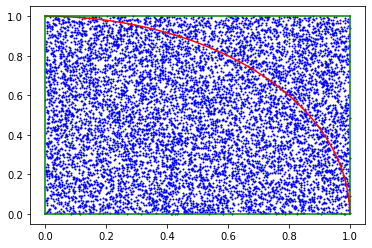

In [5]:
plt.figure()
plt.plot(x_arc, y_arc, 'r')
plt.plot([0,1],[0,0], 'g')
plt.plot([1,1],[0,1], 'g')
plt.plot([1,0],[1,1], 'g')
plt.plot([0,0],[1,0], 'g')
plt.scatter(x, y, color='b', s=1)
plt.show()

How to find all the points within the arc? That is simple. Compute distance of all the points to the origin and see the number of points which have a distance less than or equal to 1. So let us compute the eucledian distance of all sampled points to the origin.

In [6]:
rs = np.sqrt(x**2 + y**2)

Get all points less than 1.

In [7]:
points_leq_1 = np.where( rs <= 1 )[0]

Get these points from the sampled points for plotting purposes.

In [8]:
x_in_arc = x[points_leq_1]
y_in_arc = y[points_leq_1]

Visulize the points

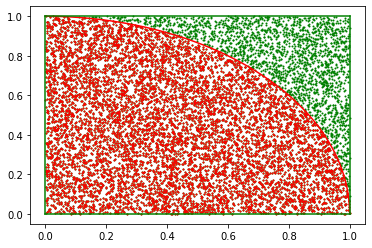

In [9]:
plt.figure()
plt.plot(x_arc, y_arc, 'r')
plt.plot([0,1],[0,0], 'g')
plt.plot([1,1],[0,1], 'g')
plt.plot([1,0],[1,1], 'g')
plt.plot([0,0],[1,0], 'g')
plt.scatter(x, y, color='g', s=1)
plt.scatter(x_in_arc, y_in_arc, color='r', s=1)
plt.show()

So now the moment of truth! Computing the value of Pi

In [10]:
num_points_in_arc = len(points_leq_1)
ratio = num_points_in_arc/total_points
pi = ratio*4
print("The approximated value of Pi is", pi)

The approximated value of Pi is 3.1416
